In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 데이터 불러오기 (학습 데이터, 테스트 데이터)

데이터 분석 단계(4.2_농구선수_데이터분석.ipynb)에서 생성한 농구 선수 포지션 예측하기의 학습 데이터 및 테스트 데이터를 로드합니다.


In [2]:
with open('./data/pkl/basketball_train.pkl', 'rb') as train_data:
    train = pickle.load(train_data)
    
with open('./data/pkl/basketball_test.pkl', 'rb') as test_data:
    test = pickle.load(test_data)

In [3]:
train

,Player,Pos,3P,TRB,BLK
13,Avery Bradley,SG,2.0,6.1,0.2
40,Montrezl Harrell,C,0.0,3.8,0.7
49,Rodney Hood,SG,1.9,3.4,0.2
67,Ben McLemore,SG,1.1,2.1,0.1
58,Zach LaVine,SG,2.6,3.4,0.2
...,...,...,...,...,...
1,Steven Adams,C,0.0,7.7,1.0
39,Tim Hardaway,SG,1.9,2.8,0.2
41,Gary Harris,SG,1.9,3.1,0.1
19,Allen Crabbe,SG,1.7,2.9,0.3


# 최적의 KNN 파라미터 찾기

- 사이킷런의 cross_val_score를 사용하면 손쉽게 KNN 모델 교차 검증(cross validation)을 수행할 수 있다.
- 이번 예제에 사용되는 교차 검증은 k-fold 교차 검증이며, k-fold 교차 검증이란 기존 데이터를 k개로 나눠서 k번 정확도를 검증하는 방법이다

In [4]:
# import kNN library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [11]:
# 최적의 K를 찾기 위해 교차 검증을 수행할 k의 범위를 3부터 학습 데이터 절반까지 지정한다
max_k_range = train.shape[0]//2
k_list=[]

for i in range(3, max_k_range, 2):
    k_list.append(i)
    
cross_validation_scores=[]
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train['Pos']

# 교차 검증(10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values, cv=10, scoring='accuracy')
    print(scores)
    cross_validation_scores.append(scores.mean())

cross_validation_scores

[1.    0.875 1.    1.    1.    0.75  1.    0.75  1.    1.   ]
[0.875 0.875 1.    1.    1.    0.75  1.    0.875 1.    1.   ]
[0.875 0.875 1.    1.    1.    0.75  1.    1.    1.    1.   ]
[1.    0.875 1.    1.    1.    0.75  1.    0.875 0.875 1.   ]
[0.875 0.875 1.    1.    1.    0.75  1.    0.875 0.875 1.   ]
[0.875 0.875 1.    1.    1.    0.75  1.    0.875 0.875 1.   ]
[0.875 0.875 1.    1.    1.    0.75  1.    0.875 0.875 1.   ]
[0.875 0.875 1.    1.    1.    0.75  1.    0.875 0.875 1.   ]
[0.875 0.875 1.    1.    1.    0.75  1.    0.875 0.875 1.   ]
[0.875 0.875 1.    1.    1.    0.75  1.    0.875 0.875 1.   ]
[0.875 0.75  1.    1.    1.    0.75  1.    0.75  0.875 1.   ]
[0.875 0.75  1.    1.    1.    0.75  1.    0.75  0.875 1.   ]
[0.875 0.75  1.    1.    1.    0.625 1.    0.75  0.875 1.   ]
[0.875 0.625 1.    1.    1.    0.625 1.    0.75  0.875 1.   ]
[0.75  0.625 1.    1.    1.    0.625 1.    0.625 0.75  1.   ]
[0.75  0.625 1.    1.    1.    0.625 1.    0.625 0.75  1.   ]
[0.75  0

[0.9375,
 0.9375,
 0.95,
 0.9375,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.9,
 0.9,
 0.8875,
 0.875,
 0.8375,
 0.8375,
 0.8375,
 0.825,
 0.8]

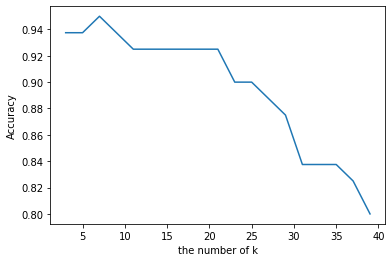

In [6]:
# visualize accuracy according to k
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

시각화를 통해 K가 7일 때 최적임을 알 수 있다. 또한 K가 25개를 넘어서면서 정확도가 많이 떨어지는 것도 확인할 수 있다.

아래 코드를 실행하여 최적의 k를 k라는 변수에 저장한다.

In [9]:
# 가장 예측율이 높은 k를 선정
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print('The best number of k : ' + str(k))

The best number of k : 7


# 모델 테스트

In [10]:
# 라이브러리 import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

# 학습에 사용될 속성을 지정
x_train = train[['3P','BLK',"TRB"]]

# 선수 포지션에 예측할 값으로 지정
y_train = train['Pos']

# KNN 모델 학습
knn.fit(x_train, y_train)

# 테스트 데이터에서 분류를 위해 사용될 속성을 지정
x_test = test[['3P', 'BLK', 'TRB']]
y_test = test['Pos']

# 테스트 시작
pred = knn.predict(x_test)

# 모델 예측 정확도(accuracy) 출력
print('accuracy : ' + str(accuracy_score(y_test, pred)))


accuracy : 0.85
